In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


# 논문 구현

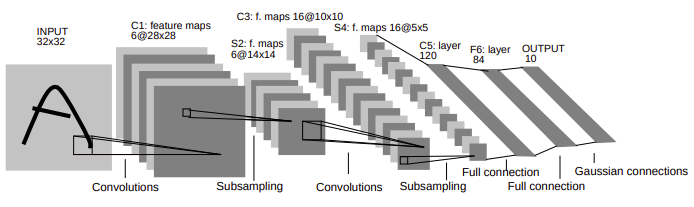

In [2]:
import tensorflow as tf 

In [9]:
input_ = tf.keras.Input(shape=(32,32,1))
x = tf.keras.layers.Conv2D(6, 5, activation='tanh')(input_) # filter 개수, filter 크기 / stride는 생략되었기 때문에 1이라 가정한다 / padding: valid
x = tf.keras.layers.AvgPool2D(2)(x) # 기본적으로 non-overlapping 방식이다 
x = tf.keras.layers.Conv2D(16, 5, activation='tanh')(x)
x = tf.keras.layers.MaxPool2D(6, 5)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='tanh')(x)
x = tf.keras.layers.Dense(84, activation='tanh')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.models.Model(input_, x)

In [6]:
# pooling 사용했을 때 
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 120)               2040

In [10]:
# pooling 사용하지 않았을 때 
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               1106040   
_________________________________________________________________
dense_7 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                850 

## ImageNet Classification with Deep Convolutional Neural Networks

> ImageNet LSVRC 대회에서 ImageNet 데이터를 사용한 CNN

## Relu

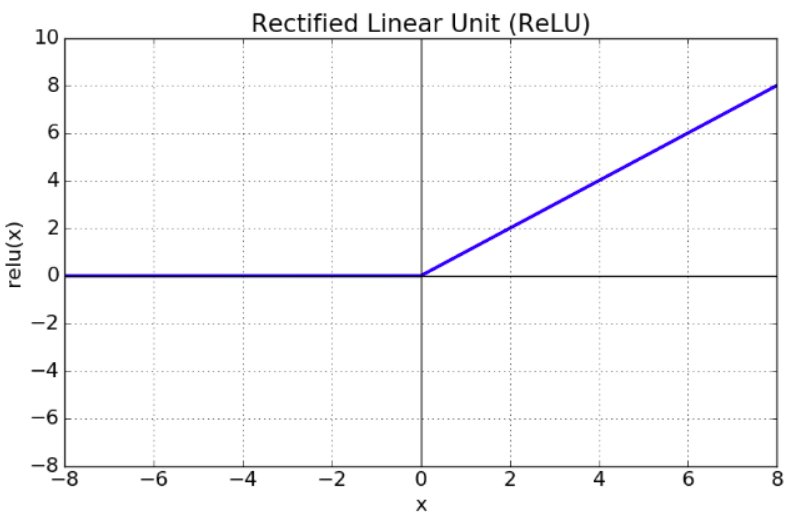

```
ReLU는 Sigmoid와 tanh가 갖는 Gradient Vanishing 문제를 해결하기 위한 함수이다 
ReLU는 sigmoid, tanh 함수보다 학습이 빠르고, 연산 비용이 적고, 구현이 매우 간단하다
```

## Dying Relu

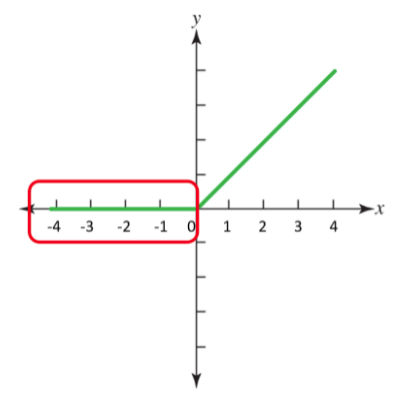

```
Dying relu는 모든 0이하의 입력에 대해서 미분 값이 0이 되어 가중치에 곱해지면서 해당 노드가 통째로 죽어버리는 현상을 말한다 

이러한 단점을 보완한 reaky relu가 있다  
```

## Normalization

```python
layer가 깊어질 수록 값의 범위가 매번 바뀌고 최소값으로 수렴이 안되는 underfitting이 발생한다 
이런 경우를 방지하기 위해서 값의 범위를 일정하게 맞춰주는 방법이 바로 normalization이다 

대표적인 정규화 방법 두 가지 

1. Min-Max Normalization (최소-최대 정규화)
- 최소값은 0, 최대값은 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환하는 방식 
- (data - MIN) / (MAX-MIN) 
2. Z-Score Normalization (Z-점수 정규화)
- 평균은 0, 표준편차는 1인 정규 분포를 그리도록 데이터의 분포를 바꾸는 방식
- 이상치(outlier) 문제를 피하는 데이터 정규화 전략-
- (data - 평균) / 표준편차
```

## Pooling

```python
1. overlapping pooling 
- 겹쳐가며 pooling을 하는 방법 
- 성능에 크게 영향을 미치는 방법은 아니다 

2. non overlapping pooling 
- 겹치지 않고 pooling을 하는 방법 
```

### pooling을 하는 이유

``` 
1. parameter 줄여주기 때문에 연산량을 줄여준다  
2. invariance한 속성을 더해준다
```

## Data augmentation

```
Overfitting을 줄이기 위한 방법으로써 이미지 데이터를 변형해서 학습 데이터의 수를 늘리는 방법이다 
이미지 데이터를 좌우반전, 상하반전, 회전, 자르기 등을 하여 학습하지 않은 데이터를 대처할 수 있는 일반적인 모델을 만들어주는 데에 효과적인 방법이다 
```

### 예시

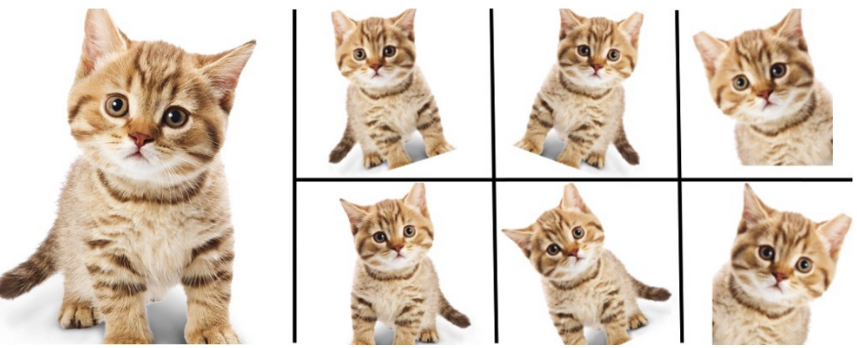

## Dropout

```
Dropout은 특정 확률로 hidden layer의 node 출력값을 0으로 설정하는 방법이다
이렇게 dropout된 node들은 foward, backward propagation에 관여를 하지 않는다 
dropout이 사용된 NN는 입력이 주어질 때마다 달라진 신경망 구조를 거치게 되고 
이는 노드간의 의존성을 약화시켜 가장 영향력 있는 노드의 연결성이 강화되는 방식으로 학습을 하게된다 
따라서 성능은 비슷하지만 연산 복잡도를 줄이면서 overfitting 문제를 해결하는 방법이 될 수 있다 

※ Fully connected layer 다음에 Dropuout을 사용한다 
```

## Result

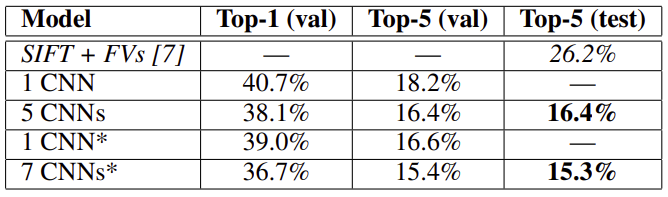

```
Ensemble기법을 사용하고 pre-trained 모델인 경우에 에러율이 더 낮았다 

※ CNNs는 Boosting기법(Ensemble)을 사용한 방법
```

## AlexNet

> 논문 구현

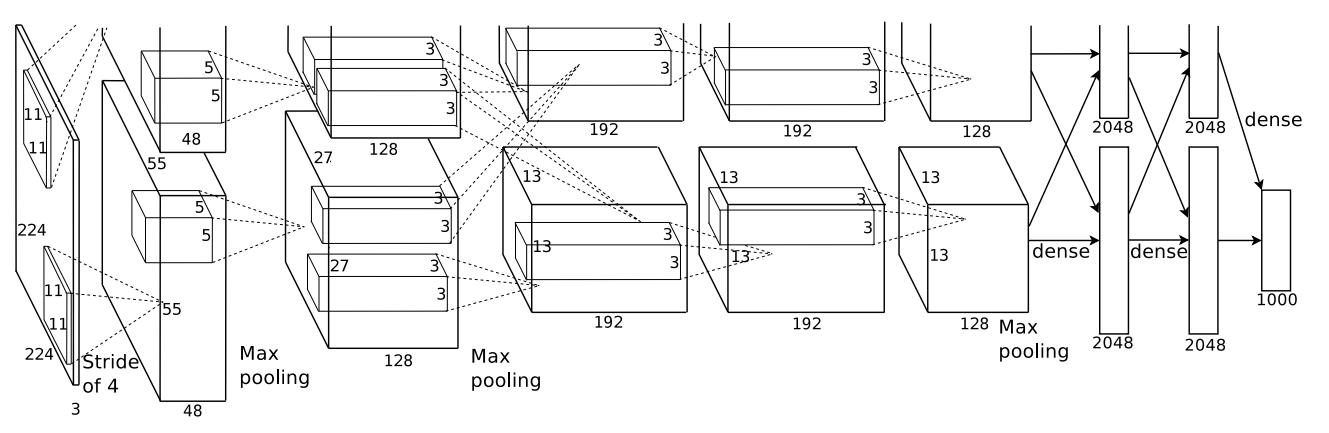

> 하드웨어 메모리가 부족하여 GPU 병렬 연산을 위해 CNN 구조를 절반으로 나누어 설계되었다  


In [3]:
# 평균은 0, 표준분포는 0.01인 정규분포 값으로 가중치를 초기화 한다 
bias = tf.keras.initializers.Constant(1) # relu 때문에 초기화 값을 1로 지정한다 (음수가 들어가면 dying relu현상이 발생하기 때문)

input_ = tf.keras.Input((224,224,3))
x = tf.keras.layers.Conv2D(96,5,4)(input_)
x = tf.keras.layers.MaxPool2D(3,2)(x) # overlapping pooling
x = tf.keras.layers.Conv2D(256,3, padding='same', bias_initializer=bias)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.MaxPool2D(3,2)(x)
x = tf.keras.layers.Conv2D(384,3, padding='same', bias_initializer='ones')(x) # ones 단축키는 버전에따라 지원하지 않을 수 있다 -
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(384,3, padding='same', bias_initializer=bias)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Conv2D(256,3, padding='same', bias_initializer=bias)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, bias_initializer=bias)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4096, bias_initializer=bias)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, bias_initializer=bias, activation='softmax')(x)
model = tf.keras.models.Model(input_,x) # tensorflow from_logit 

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        7296      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       221440    
_________________________________________________________________
re_lu (ReLU)                 (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120

## Loss 3가지

```python
loss function 사용하는 3가지 방법 

1. 객체지향 => 옵션 사용 가능 
2. 함수형 => 옵션 사용 가능하지만 parital을 사용해야 한다 (Higer order function) 
3. 함수형 단축 => 옵션 사용 불가

label encoding 방식에 따라서 loss function 방식도 달라져야 한다 
- one-hot encoding (Multi label 일때)
- sparse label encoding (Multi label 아닐때) => Sparse가 붙은 loss function 사용 
```

In [5]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False))

In [6]:
tf.keras.utils.to_categorical # label에서 one-hot으로 바꿔준다 

<function tensorflow.python.keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>